# Team 4
# William Wiemann, Tyler Carr, Benjamin Ranew 


## Preprocessing

Preprocessing the data as necessary to ensure that all values can be processed by a classification model.

- All of the data is numeric, so none needs to be converted from text to numbers
- Scaling IS necessary though! Use StandardScaler instead of MinMaxScaler because is much less affected by outliers
- No features appear to be categorical, so all can be run through the StandardScaler

## Correlations

Observing the correlation dataframe and graphs that have somewhat of a linear trend in the correlation matrix, these are the highest correlating features:

- total_phenols and flavanoids
- od280/od315_of_diluted_wines and flavanoids
- od280/od315_of_diluted_wines and total_phenols
- proanthocyanins and flavanoids

## Performance

Logistic Regression seems to be slightly better than K-Nearest Neighbors, but not by much. Both have right below or above 90% for all of the performance scores (accuracy, precision, recall, f1 score).

## Confusion Matrix

Both have very few false positives and negatives with Logistic Regression having slightly less misclassifications than K-Nearest Neighbors.

## ROC Curve

The ROC Curve shows that both models are performing very well since the curve arcs upwards towards the top left corner. The three colors on the curves represent the three classes and how well they are performing. The curves are jagged instead of smooth because there isn't much data to work with for training or testing.

In [ ]:
from sklearn.datasets import load_wine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd

In [ ]:
data = load_wine()

In [ ]:
# Output the shape of the data set
data['data'].shape

(178, 13)

In [ ]:
df = pd.DataFrame(data['data'], columns=list(data.feature_names)) # Create dataframe from data and include feature names too

In [ ]:
# See min, max, average, and other statistics from this table for each of the features
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
# Highest correlating attributes: attr1 and attr2 and the correlation between them, sorted by top correlating
def get_correlations():
  corrs = {'attr1': [], 'attr2': [], 'corr': []}

  for attr1 in df.columns:
    for attr2 in df.columns:
      if attr1 != attr2:
        corrs['attr1'].append(attr1)
        corrs['attr2'].append(attr2)
        corrs['corr'].append(df[attr1].corr(df[attr2]))

  return pd.DataFrame(corrs).sort_values('corr', ascending=False).head(7)

In [ ]:
get_correlations()

,attr1,attr2,corr
65,total_phenols,flavanoids,0.864564
77,flavanoids,total_phenols,0.864564
138,od280/od315_of_diluted_wines,flavanoids,0.787194
82,flavanoids,od280/od315_of_diluted_wines,0.787194
137,od280/od315_of_diluted_wines,total_phenols,0.699949
70,total_phenols,od280/od315_of_diluted_wines,0.699949
102,proanthocyanins,flavanoids,0.652692


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3af1b0ed0>,
      dtype=object)

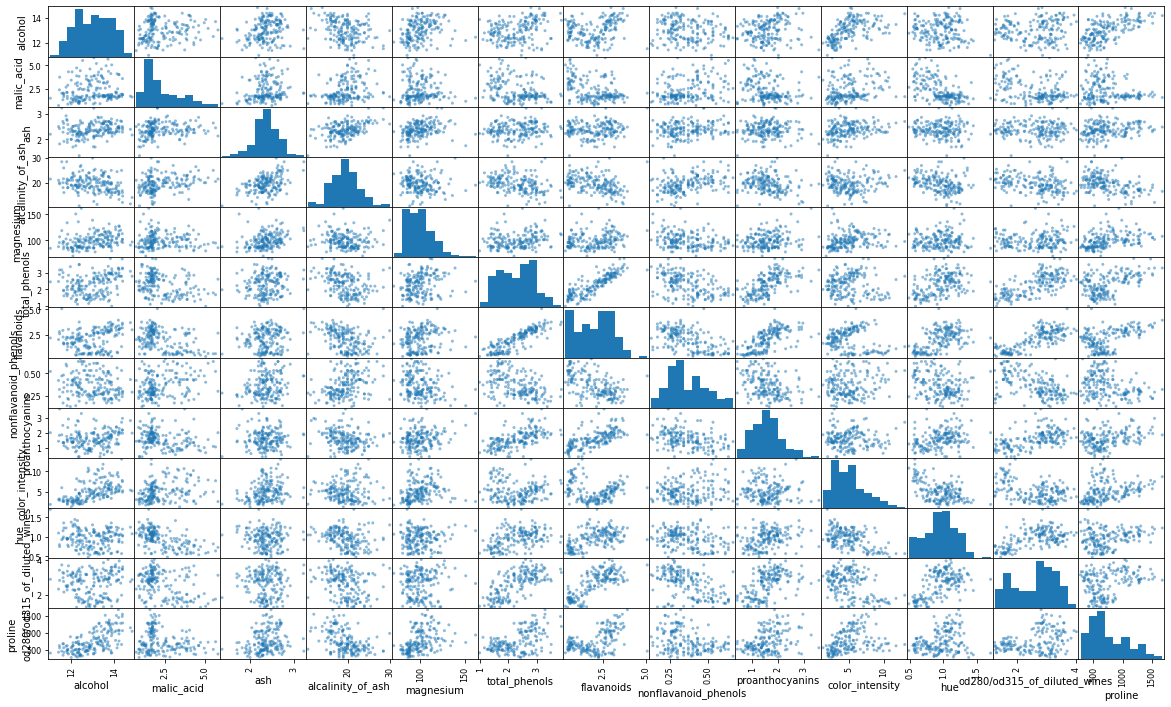

In [ ]:
# Visualization of correlations
scatter_matrix(df, figsize=(20, 12))

In [ ]:
# Demonstrate performance by plotting the ROC curve
def plot_roc(y_test, probs):
  colors = ['blue', 'red', 'green']

  # Iterate through available targets and plot the line for each target in a different color
  for i, target in enumerate(list(set(data.target))):
      fpr, tpr, _ = roc_curve(y_test[:,i], probs[:, i])
      plt.plot(fpr, tpr, color=colors[i], label=target)

  # Set up plot and display
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
# Show the confusion matrix
def print_confusion_matrix(y_test, probs):
  cms = multilabel_confusion_matrix(y_test, probs)

  # Separate results into something more presentable
  return pd.DataFrame({
      'target': list(range(cms.shape[0])),
      'true positive': [cm[0][0] for cm in cms],
      'false negative': [cm[0][1] for cm in cms],
      'false positive': [cm[1][0] for cm in cms],
      'true negative': [cm[1][1] for cm in cms]
  })

In [ ]:
# Show the performance (accuracy, precision, recall, f1 score)
def print_stats(y_test, probs):
  print("Accuracy:", accuracy_score(y_test, probs))
  print("Precision:", precision_score(y_test, probs, average='weighted'))
  print("Recall:", recall_score(y_test, probs, average='weighted'))
  print("F1:", f1_score(y_test, probs, average='weighted'))

In [ ]:
# Create pipeline with standard scaler
num_pipeline = Pipeline([
  ('scaler', StandardScaler()),
])

In [ ]:
df_scaled = num_pipeline.fit_transform(df) # Fit dataframe to pipeline

df_scaled = pd.DataFrame(df_scaled, columns=list(data.feature_names)) # Add feature names again

In [ ]:
# Binarize the targets https://stackoverflow.com/a/51424579/3675086
y = label_binarize(data.target, classes=list(set(data.target)))

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.3)

In [ ]:
# K nearest neighbors
# Train, test
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
probs = knn_clf.predict(X_test)

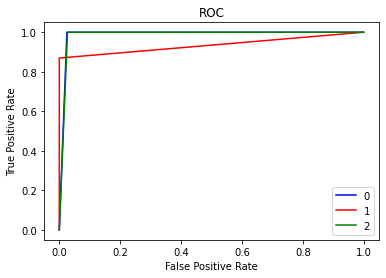

,target,true positive,false negative,false positive,true negative
0,0,39,1,0,14
1,1,31,0,3,20
2,2,36,1,0,17


In [ ]:
plot_roc(y_test, probs)
display(print_confusion_matrix(y_test, probs))

In [ ]:
print_stats(y_test, probs)

Accuracy: 0.9444444444444444
Precision: 0.9652263374485597
Recall: 0.9444444444444444
F1: 0.9523495542741733


In [ ]:
# Develop, train, and demonstrate performance by plotting the ROC curve
X_train, X_test, y_train, y_test = train_test_split(df_scaled, data.target, test_size=0.3)

In [ ]:
# Logistic Regression
# Train, test
log_clf = LogisticRegression(multi_class='multinomial')
log_clf.fit(X_train, y_train)
probs = log_clf.predict(X_test)

In [ ]:
# Binarize the true and predicted values for use in following functions
y_test = label_binarize(y_test, classes=list(set(y_test)))
probs = label_binarize(probs, classes=list(set(probs)))

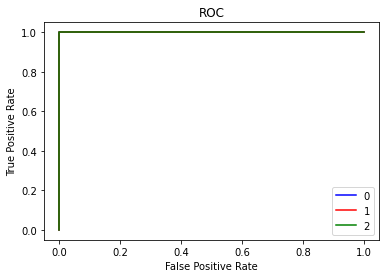

,target,true positive,false negative,false positive,true negative
0,0,36,0,0,18
1,1,35,0,0,19
2,2,37,0,0,17


In [ ]:
plot_roc(y_test, probs)
display(print_confusion_matrix(y_test, probs))

In [ ]:
print_stats(y_test, probs)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
